In [1]:
# Import necessary libraries
import pandas as pd
from io import StringIO
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

# Load dataset from string
data_str = '''
Name,Surname,Age,Smokes,AreaQ,Alkhol,Result
John,Wick,35,3,5,4,1
John,Constantine,27,20,2,5,1
Camela,Anderson,30,0,5,2,0
Alex,Telles,28,0,8,1,0
Diego,Maradona,68,4,5,6,1
Cristiano,Ronaldo,34,0,10,0,0
Mihail,Tal,58,15,10,0,0
Kathy,Bates,22,12,5,2,0
Nicole,Kidman,45,2,6,0,0
Ray,Milland,52,18,4,5,1
Fredric,March,33,4,8,0,0
Yul,Brynner,18,10,6,3,0
Joan,Crawford,25,2,5,1,0
Jane,Wyman,28,20,2,8,1
Anna,Magnani,34,25,4,8,1
"Katharine",Hepburn,39,18,8,1,0
"Katharine",Hepburn,42,22,3,5,1
Barbra,Streisand,19,12,8,0,0
"Maggie",Smith,62,5,4,3,1
"Glenda",Jackson,73,10,7,6,1
"Jane",Fonda,55,15,1,3,1
"Maximilian",Schell,33,8,8,1,0
"Gregory",Peck,22,20,6,2,0
"Sidney",Poitier,44,5,8,1,0
"Rex",Harrison,77,3,2,6,1
"Lee",Marvin,21,20,5,3,0
"Paul",Scofield,37,15,6,2,0
"Rod",Steiger,34,12,8,0,0
"John",Wayne,55,20,1,4,1
"Gene",Hackman,40,20,2,7,1
"Marlon",Brando,36,13,5,2,0
"Jack",Lemmon,56,20,3,3,1
"Jack",Nicholson,47,15,1,8,1
"Peter","Finch",62,25,3,4,1
"Richard",Dreyfuss,26,10,7,2,0
"Dustin",Hoffman,25,20,8,2,0
"Henry","Henry",59,20,3,4,1
"Robert",Duvall,62,15,5,5,1
"Ellen",Burstyn,33,25,8,2,0
"Faye",Dunaway,37,10,5,3,0
"Diane",Keaton,50,20,2,4,1
"Jane",Fonda,47,12,8,0,0
"Sally",Field,69,20,5,4,1
"Sissy",Spacek,63,20,4,5,1
"Jessica",Lange,39,15,7,2,0
"Gwyneth",Paltrow,21,20,8,3,0
"Halle",Berry,31,20,9,4,0
"Nicole",Kidman,28,10,4,1,0
"Charlize",Theron,53,20,6,3,1
"Katharine",Hepburn,62,20,5,6,1
"Katharine",Hepburn,42,12,6,2,0
Barbra,Streisand,44,30,1,6,1
"Maggie",Smith,26,34,1,8,1
"Glenda",Jackson,35,20,5,1,0
"Ernest",Borgnine,26,13,6,1,0
"Alec",Guinness,77,20,5,4,1
"Charlton",Heston,75,15,3,5,1
"Gregory",Peck,43,30,3,8,1
"Sidney",Poitier,51,25,9,0,0
'''

# Read the CSV string into a DataFrame
df = pd.read_csv(StringIO(data_str))

# 1. Data Preprocessing
# Check for missing values
print("Missing values:\n", df.isnull().sum())  # No missing values expected

# Drop non-predictive columns (Name, Surname)
df = df.drop(['Name', 'Surname'], axis=1)

# Define features (X) and target (y)
X = df.drop('Result', axis=1)  # Features: Age, Smokes, AreaQ, Alkhol
y = df['Result']  # Target: Result (0 or 1)

# Scale features for PCA
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Also split original (unscaled) data for Decision Tree (since DT doesn't require scaling)
X_train_orig, X_test_orig, _, _ = train_test_split(X, y, test_size=0.2, random_state=42)

Matplotlib is building the font cache; this may take a moment.


Missing values:
 Name       0
Surname    0
Age        0
Smokes     0
AreaQ      0
Alkhol     0
Result     0
dtype: int64



Baseline Decision Tree Evaluation:
Accuracy: 0.9167
Precision: 1.0000
Recall: 0.7500
F1-Score: 0.8571
Confusion Matrix:
 [[8 0]
 [1 3]]

Feature Importance (Baseline Decision Tree):
   Feature  Importance
3  Alkhol    0.900664
0     Age    0.099336
1  Smokes    0.000000
2   AreaQ    0.000000


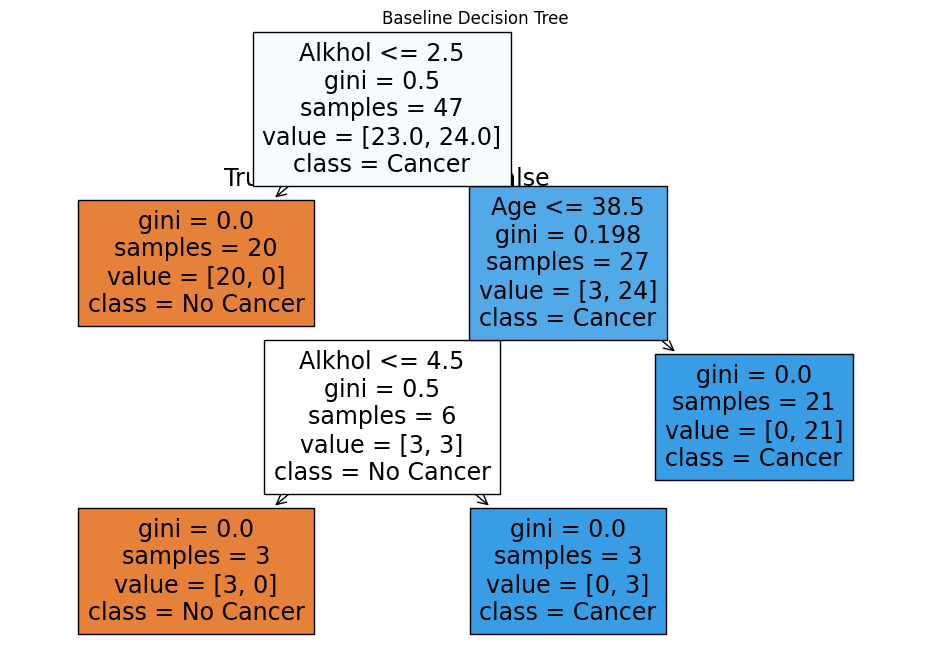

In [2]:
# 2. Baseline Decision Tree Classifier
# Initialize and train the Decision Tree
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train_orig, y_train)

# Predict on test set
y_pred = dt.predict(X_test_orig)

# Evaluate the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)

# Print evaluation metrics
print("\nBaseline Decision Tree Evaluation:")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print("Confusion Matrix:\n", conf_matrix)

# Feature importance
feature_importance = pd.DataFrame({
    'Feature': X.columns,
    'Importance': dt.feature_importances_
}).sort_values(by='Importance', ascending=False)
print("\nFeature Importance (Baseline Decision Tree):\n", feature_importance)

# Visualize the Decision Tree
plt.figure(figsize=(12, 8))
plot_tree(dt, feature_names=X.columns, class_names=['No Cancer', 'Cancer'], filled=True)
plt.title("Baseline Decision Tree")
plt.show()

In [4]:
# 3. PCA for Dimensionality Reduction
# Apply PCA to determine components for >=95% variance
pca = PCA()
X_pca = pca.fit_transform(X_scaled)
explained_variance = pca.explained_variance_ratio_.cumsum()
n_components = next(i for i, v in enumerate(explained_variance, 1) if v >= 0.95)

print(f"\nNumber of PCA components to retain >=95% variance: {n_components}")

# Apply PCA with selected number of components
pca = PCA(n_components=n_components)
X_train_pca = pca.fit_transform(X_train)
X_test_pca = pca.transform(X_test)

# Train Decision Tree on PCA-transformed data
dt_pca = DecisionTreeClassifier(random_state=42)
dt_pca.fit(X_train_pca, y_train)

# Predict and evaluate
y_pred_pca = dt_pca.predict(X_test_pca)

# Evaluate PCA-based model
accuracy_pca = accuracy_score(y_test, y_pred_pca)
precision_pca = precision_score(y_test, y_pred_pca)
recall_pca = recall_score(y_test, y_pred_pca)
f1_pca = f1_score(y_test, y_pred_pca)
conf_matrix_pca = confusion_matrix(y_test, y_pred_pca)

# Print PCA evaluation metrics
print("\nDecision Tree with PCA Evaluation:")
print(f"Accuracy: {accuracy_pca:.4f}")
print(f"Precision: {precision_pca:.4f}")
print(f"Recall: {recall_pca:.4f}")
print(f"F1-Score: {f1_pca:.4f}")
print("Confusion Matrix:\n", conf_matrix_pca)


Number of PCA components to retain >=95% variance: 4

Decision Tree with PCA Evaluation:
Accuracy: 0.9167
Precision: 1.0000
Recall: 0.7500
F1-Score: 0.8571
Confusion Matrix:
 [[8 0]
 [1 3]]


In [5]:
# 4. Discussion
# Feature Importance: The baseline Decision Tree's feature importance shows which features (e.g., Alkhol, Smokes) drive predictions.
# PCA Effect: PCA reduces the feature space while retaining >=95% variance, potentially simplifying the model.
# Performance Comparison: Compare baseline vs. PCA metrics. If PCA metrics are lower, it may indicate loss of some predictive information.
# If PCA metrics are similar or better, it suggests dimensionality reduction removed noise without hurting performance.
print("\nDiscussion:")
print("Feature Importance: Check the feature importance table above. Features like 'Alkhol' or 'Smokes' likely have higher importance due to their relevance to lung cancer risk.")
print(f"PCA Effect: PCA reduced features to {n_components} components. Compare metrics to see if performance is maintained or reduced.")
print("If PCA metrics are similar to baseline, dimensionality reduction simplified the model without significant loss. If lower, some predictive information may have been lost.")


Discussion:
Feature Importance: Check the feature importance table above. Features like 'Alkhol' or 'Smokes' likely have higher importance due to their relevance to lung cancer risk.
PCA Effect: PCA reduced features to 4 components. Compare metrics to see if performance is maintained or reduced.
If PCA metrics are similar to baseline, dimensionality reduction simplified the model without significant loss. If lower, some predictive information may have been lost.
